In [1]:
!pip install mediapipe opencv-python

In [ ]:
pip install mediapipe

In [2]:
import mediapipe as mp
import cv2
import numpy as np
import uuid 
import os

In [ ]:
d_d=mp.solutions.drawing_utils
hands_details=mp.solutions.hands

In [ ]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

# For static images:
IMAGE_FILES = []
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print and draw face mesh landmarks on the image.
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
      print('face_landmarks:', face_landmarks)
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_iris_connections_style())
    cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)

# For webcam input:
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
cap = cv2.VideoCapture(0)
with mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as face_mesh:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(image)

    # Draw the face mesh annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if results.multi_face_landmarks:
      for face_landmarks in results.multi_face_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_tesselation_style())
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_CONTOURS,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_contours_style())
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_IRISES,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_iris_connections_style())
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Face Mesh', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()


In [58]:
import cv2
import mediapipe as mp
image = cv2.imread("E:/ML/KLEOS_Hackathon/mystuff/lie/face162.jpg")

In [59]:
# Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh()

In [60]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Facial landmarks
result = face_mesh.process(rgb_image)

183 183 3


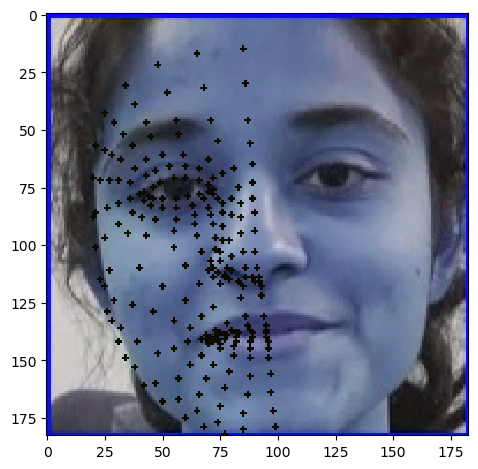

In [162]:
import cv2
import mediapipe as mp
image = cv2.imread("E:/ML/KLEOS_Hackathon/mystuff/truth/face2.jpg")

mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh()

rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Facial landmarks
result = face_mesh.process(rgb_image)

height, width, _ = image.shape
for facial_landmarks in result.multi_face_landmarks:
    for i in range(0,234):
        pt1 = facial_landmarks.landmark[i]
        x = int(pt1.x * width)
        y = int(pt1.y * height)
#         print(x,y)
        cv2.circle(image, (x, y), 1, (10, 10, 0), -1)
        
# for i in result.multi_face_landmarks:
#     for j in range(20,21):
#         print(i.landmark[j])
print(height,width,_)
import skimage.io as imageio
imageio.imshow(image);

In [ ]:
'''
Rajshree's eye
coordinates:
(25-30)

42 81
68 80
53 66
60 66
47 68
43 70


Samruddhi's eye:
61 99
94 101
78 79
86 80
69 81
64 84
'''





In [ ]:
import cv2
import mediapipe as mp
image = cv2.imread("E:/ML/KLEOS_Hackathon/mystuff/truth/face2.jpg")

mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh()

rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Facial landmarks
result = face_mesh.process(rgb_image)


def get_area(image, draw, topL, topR, bottomR, bottomL):
  topY = int((topR.y+topL.y)/2 * image.shape[0])
  botY = int((bottomR.y+bottomL.y)/2 * image.shape[0])
  leftX = int((topL.x+bottomL.x)/2 * image.shape[1])
  rightX = int((topR.x+bottomR.x)/2 * image.shape[1])
  if draw:
    image = cv2.circle(image, (leftX,topY), 2, (255,0,0), 2)
    image = cv2.circle(image, (leftX,botY), 2, (255,0,0), 2)
    image = cv2.circle(image, (rightX,topY), 2, (255,0,0), 2)
    image = cv2.circle(image, (rightX,botY), 2, (255,0,0), 2)
  return image[topY:botY, rightX:leftX]

    
height, width, _ = image.shape
for facial_landmarks in result.multi_face_landmarks:
    for i in range(25,30):
        pt1 = facial_landmarks.landmark[i]
        x = int(pt1.x * width)
        y = int(pt1.y * height)
        cv2.circle(image, (leftX,topY), 2, (255,0,0), 2)
        
# for i in result.multi_face_landmarks:
#     for j in range(20,21):
#         print(i.landmark[j])
print(height,width,_)
import skimage.io as imageio
imageio.imshow(image);

In [86]:
face_mesh_results = face_mesh_images.process(sample_img[:,:,::-1])

LEFT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LEFT_EYE)))
RIGHT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_RIGHT_EYE)))

if face_mesh_results.multi_face_landmarks:

    for face_no, face_landmarks in enumerate(face_mesh_results.multi_face_landmarks):

        print(f'FACE NUMBER: {face_no+1}')
        print('-----------------------')

        print(f'LEFT EYE LANDMARKS:n')

        for LEFT_EYE_INDEX in LEFT_EYE_INDEXES[:2]:

            print(face_landmarks.landmark[LEFT_EYE_INDEX])

        print(f'RIGHT EYE LANDMARKS:n')

        for RIGHT_EYE_INDEX in RIGHT_EYE_INDEXES[:2]:

            print(face_landmarks.landmark[RIGHT_EYE_INDEX])


NameError: name 'face_mesh_images' is not defined

In [98]:
def get_unique(c):
    temp_list =list(c)
    temp_set=set()
    for t in temp_list:
        temp_set.add(t[0])
        temp_set.add(t[1])
    return list(temp_set)

img=cv2.imread("E:/ML/KLEOS_Hackathon/mystuff/lie/face162.jpg")
img =cv2.resize(img,(600,600))
mp_face_mesh = mp.solutions.face_mesh

connections_irises = mp_face_mesh.FACEMESH_IRISES
connections_irises
irises_indices =get_unique(connections_irises)
irises_indices

[469, 470, 471, 472, 474, 475, 476, 477]